In [1]:
import matplotlib.pyplot as plt
import json
import numpy as np
import shap

In [2]:
class const:
    label = 'CI'  # AF,AS,MI,CI
    label_ch = '脑梗'  # 房颤,动脉粥样硬化,心梗,脑梗
    shap_json_path = r'%s%s_shap_dict.json'
    thresholds_json_path = r'%s%s_thresholds_dict.json'

## SHAP

房颤: Predicted Probability for Sample: 0.07


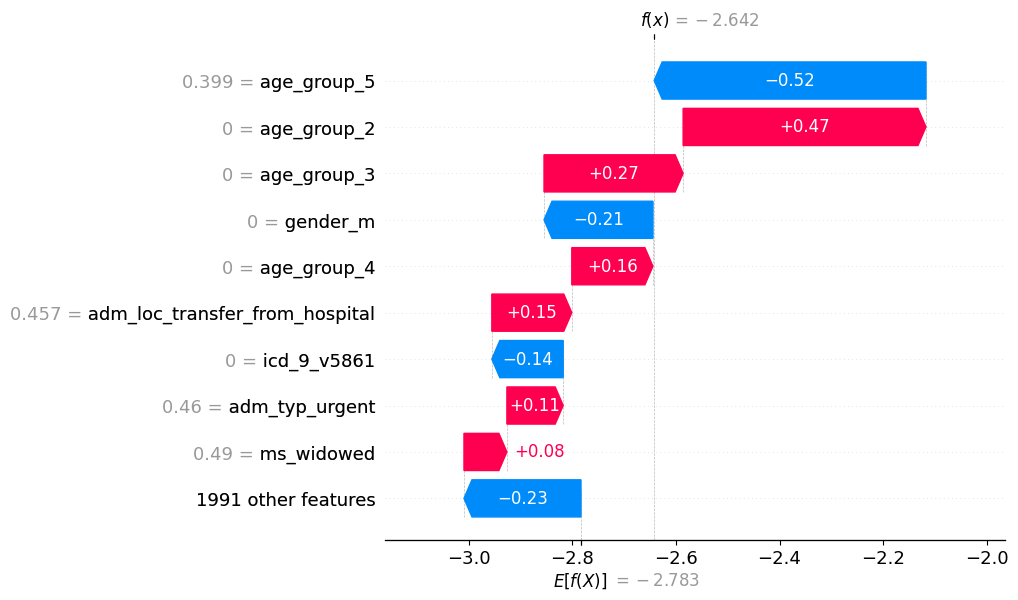

动脉粥样硬化: Predicted Probability for Sample: 0.08


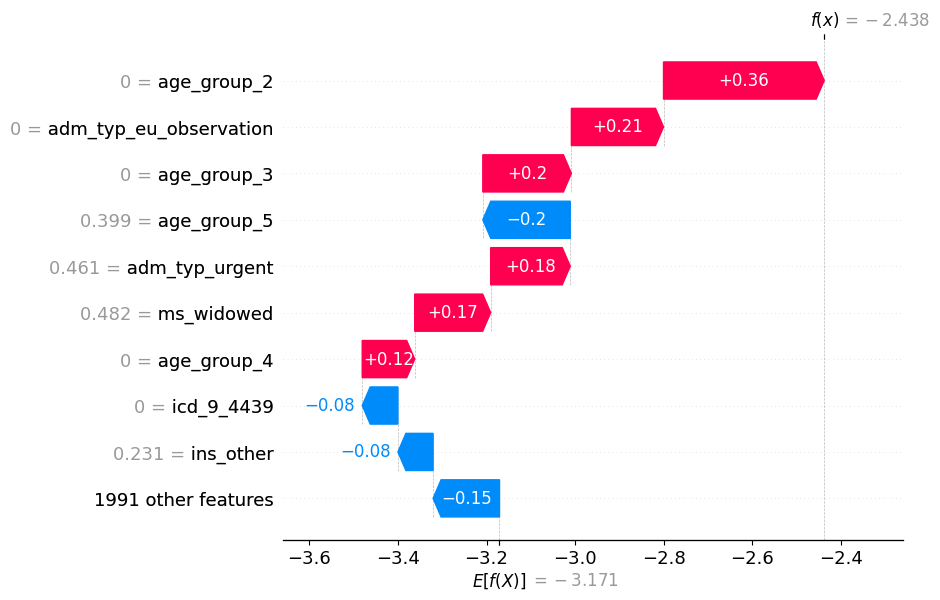

心梗: Predicted Probability for Sample: 0.42


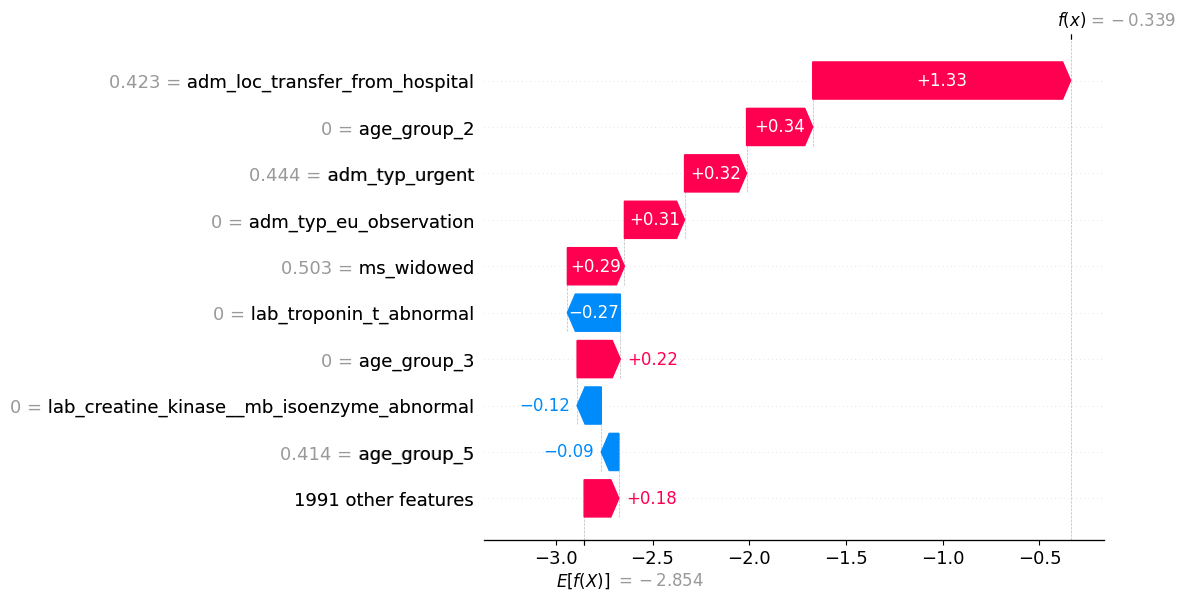

脑梗: Predicted Probability for Sample: 0.33


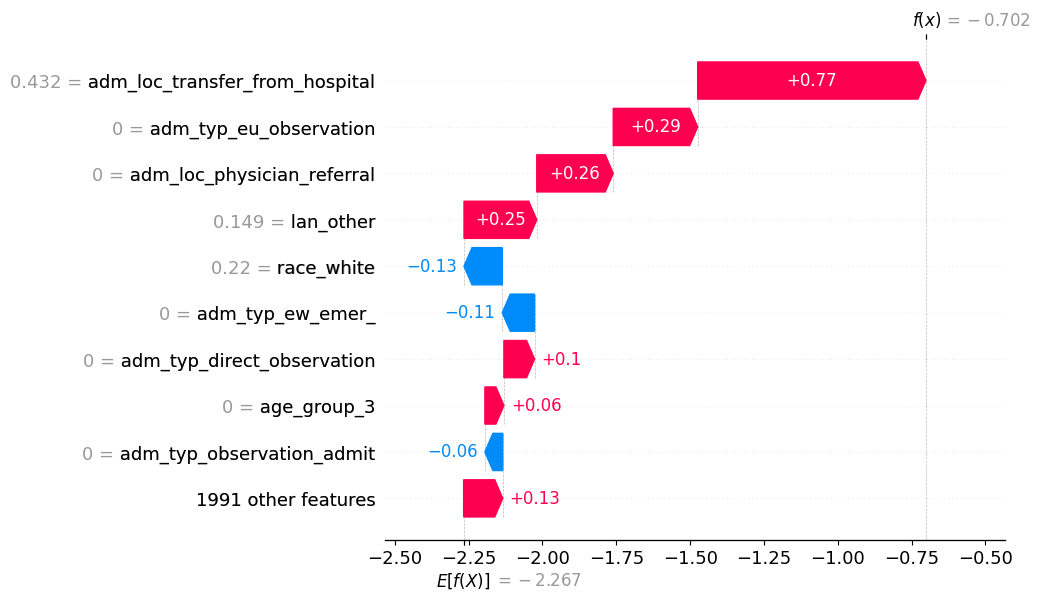

In [3]:
def out_shap(label_ch, label):
    data = json.load(open(const.shap_json_path % (label_ch, label), 'r', encoding='utf-8'))
    print(f"{label_ch}: Predicted Probability for Sample: {data['predicted_proba']:.2f}")  # 输出预测的概率值
    shap_dict = shap.Explanation(
            values=np.array(data["values"]),
            base_values=data["base_values"],
            data=np.array(data["data"]),
            feature_names=data["feature_names"]
        )
    shap.waterfall_plot(shap_dict)  # 使用 waterfall plot 来显示该样本的特征重要性
out_shap('房颤', 'AF')
out_shap('动脉粥样硬化', 'AS')
out_shap('心梗', 'MI')
out_shap('脑梗', 'CI')

## thresholds

房颤：


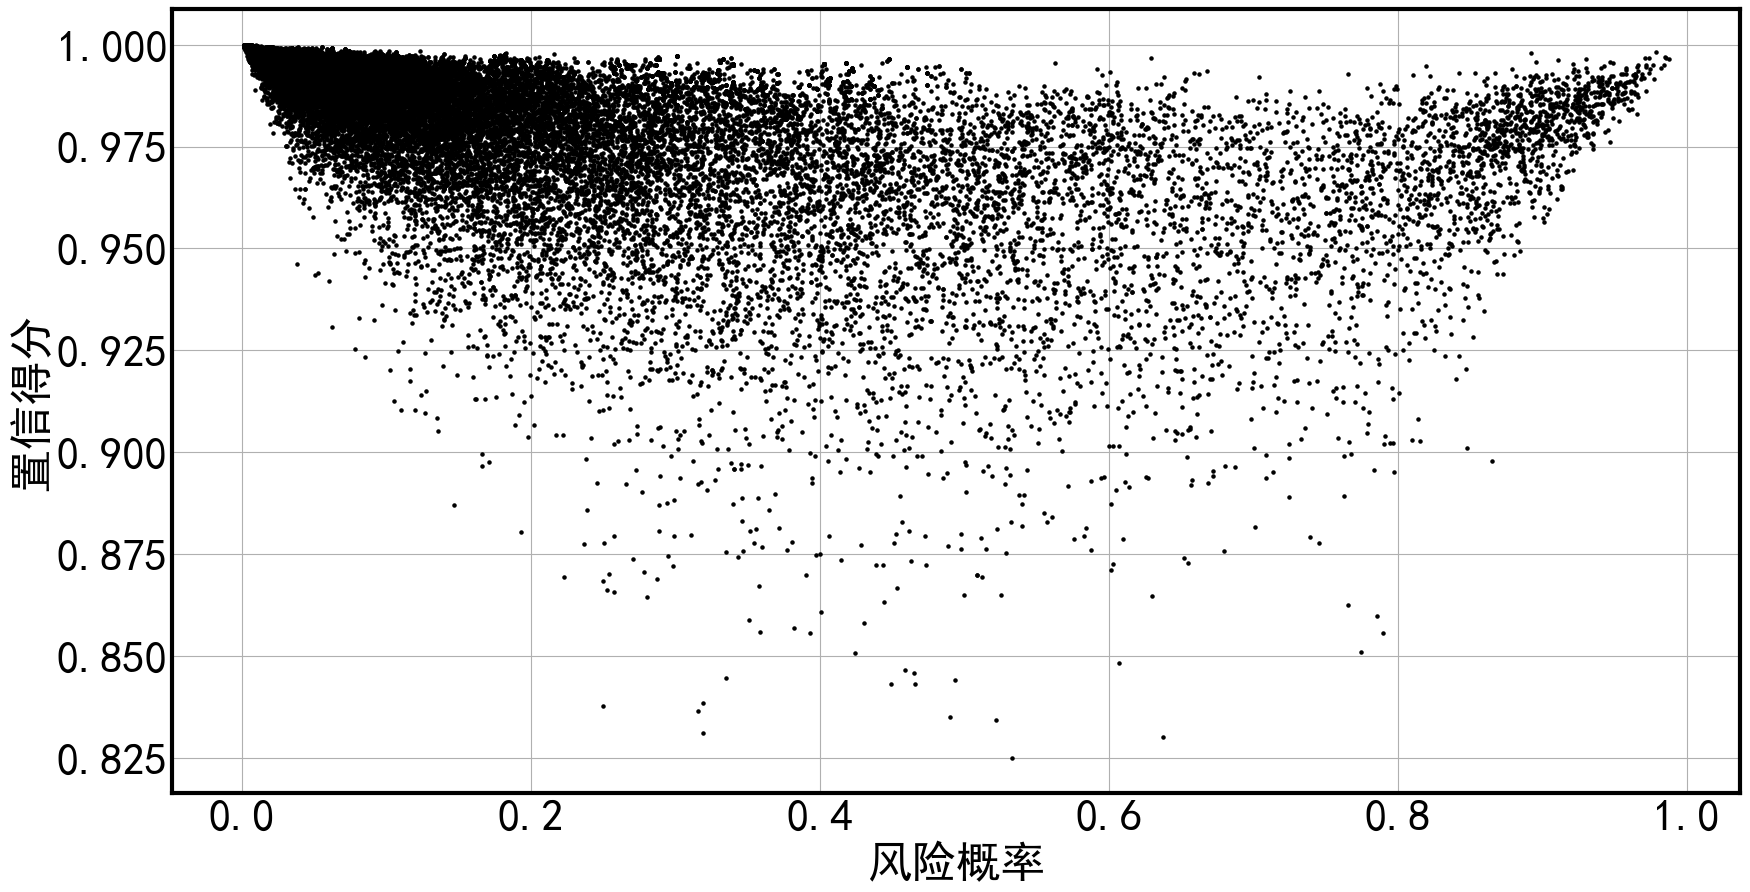

动脉粥样硬化：


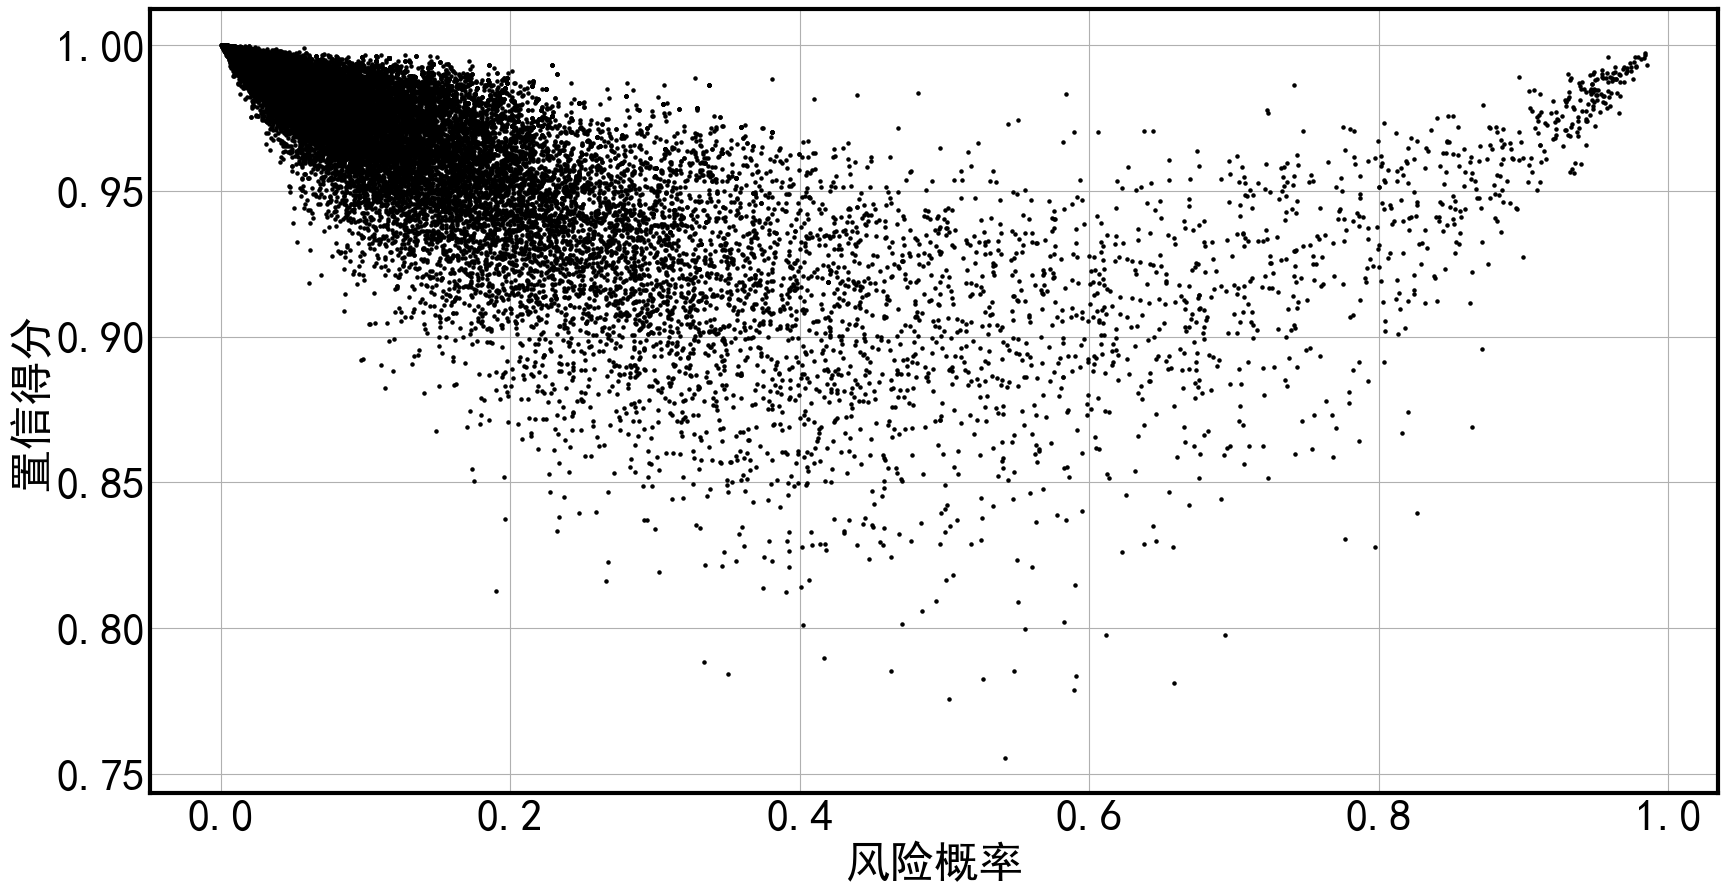

心梗：


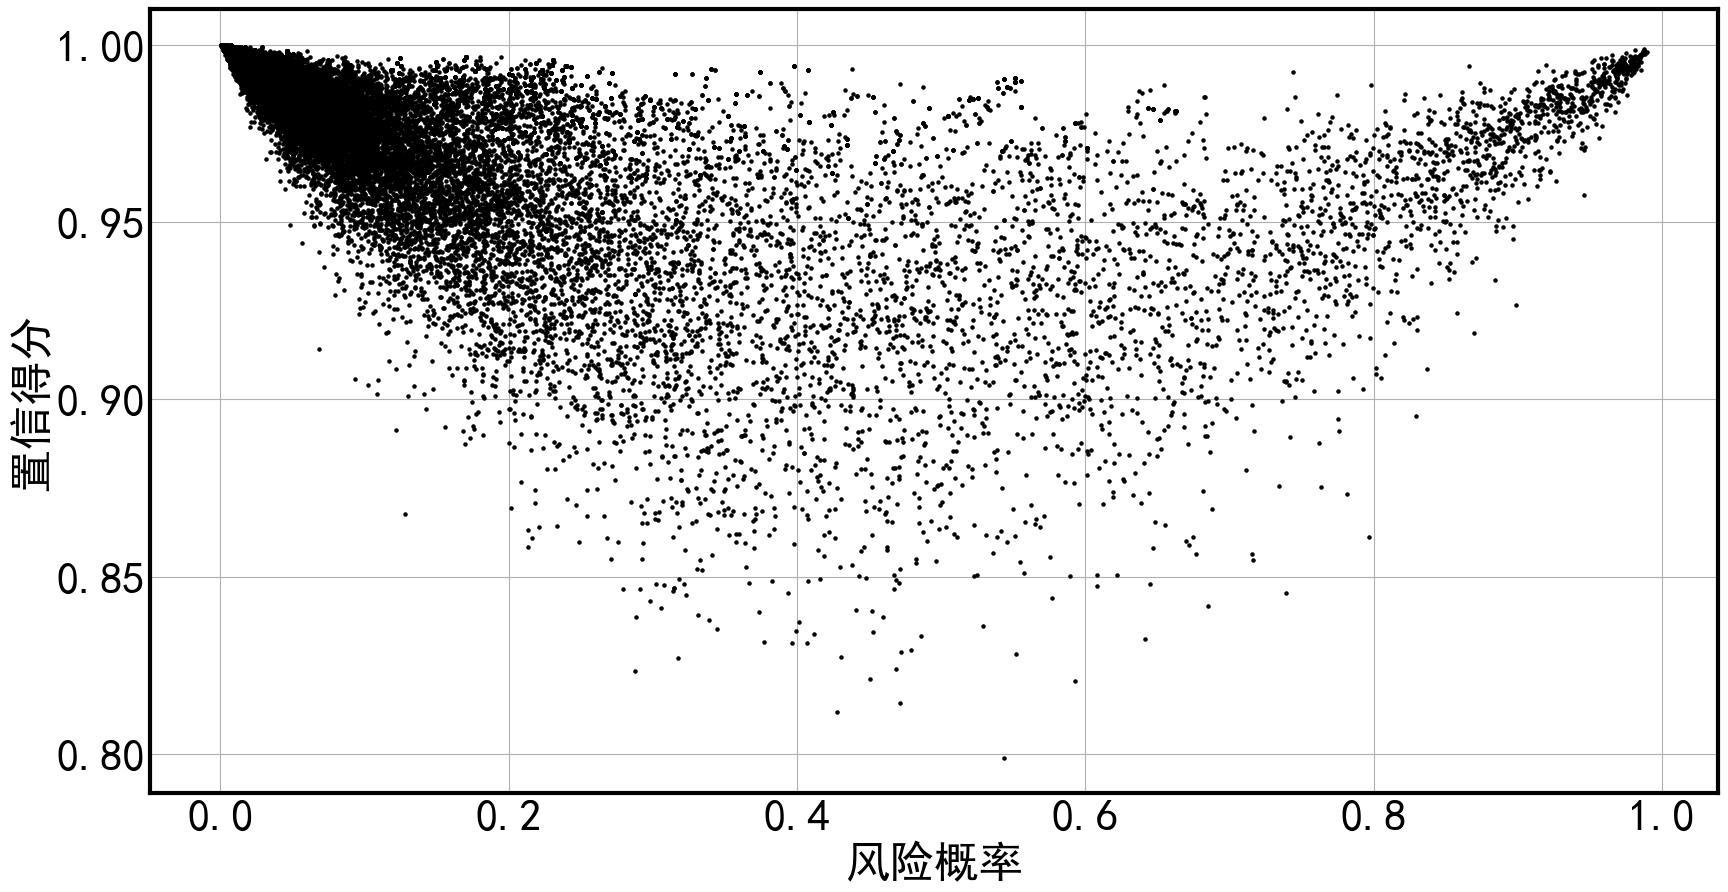

脑梗：


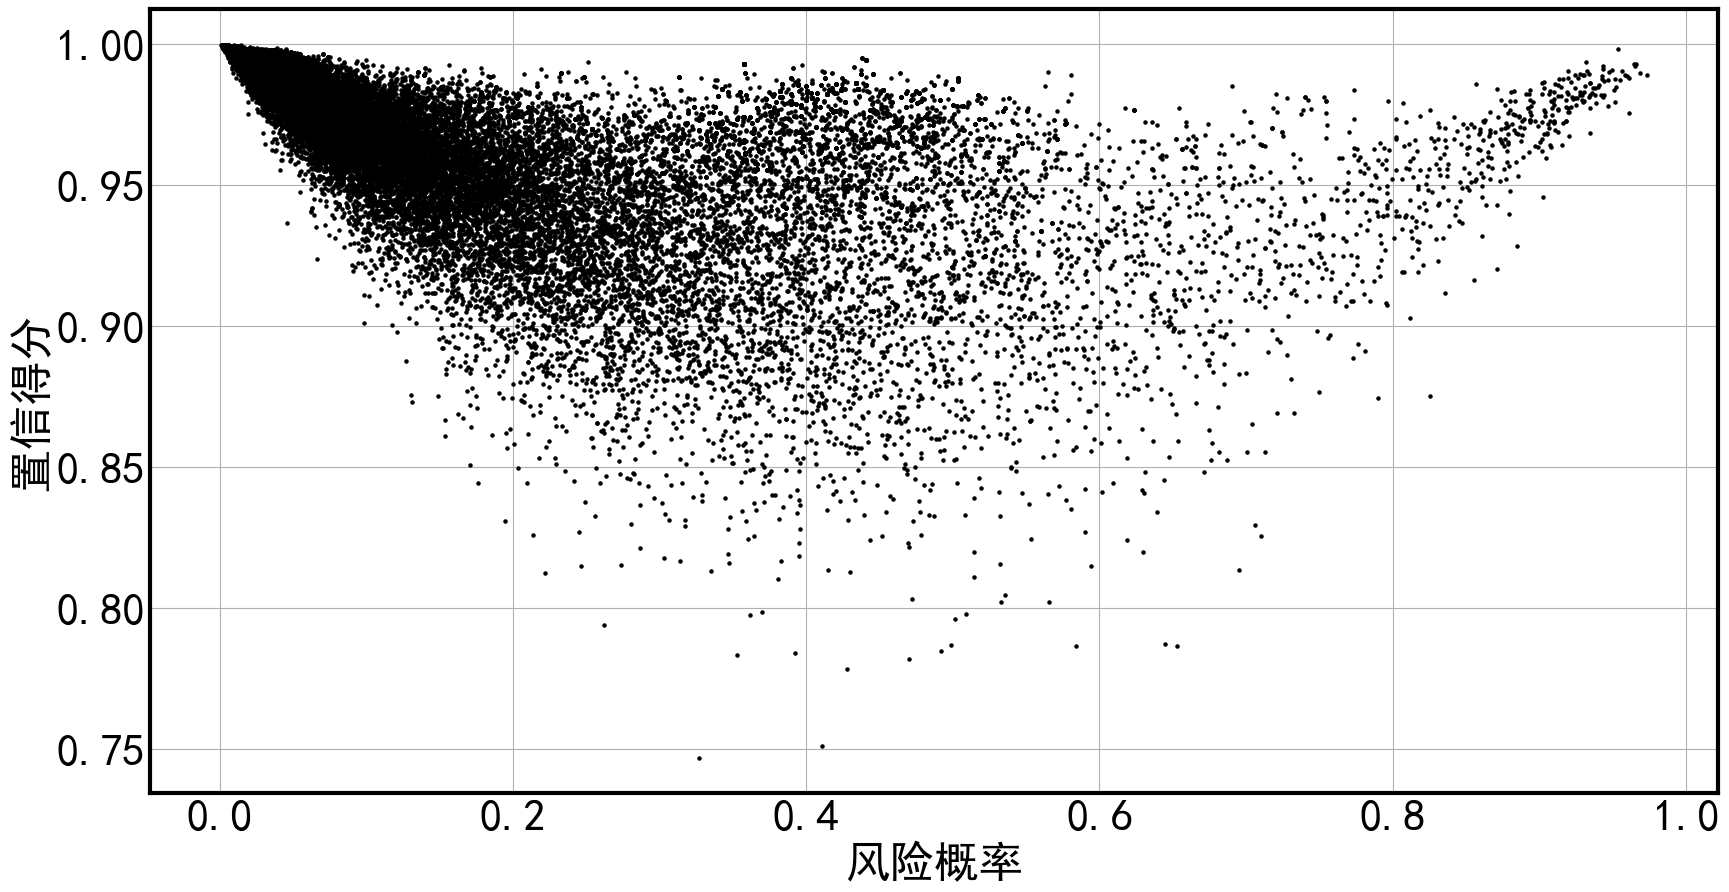

In [5]:
plt.style.use('_mpl-gallery')
plt.rcParams['font.family'] = ['SimHei', 'Times New Roman']
def out_thresholds(label_ch, label):
    print("%s：" % label_ch)
    thresholds_dict = json.load(open(const.thresholds_json_path % (label_ch, label), 'r', encoding='utf-8'))
    fig_3=plt.figure(figsize=(16,8))
    ax1=fig_3.add_subplot(111)
    plt.scatter(thresholds_dict["pred_pro_mean"],thresholds_dict["pred_pro_std"],c='k',s=5)
    plt.rcParams.update({'font.size': 32})
    plt.xlabel('风险概率')
    plt.ylabel('置信得分')
    ax1.spines['bottom'].set_linewidth(3)#设置底部坐标轴的粗细
    ax1.spines['left'].set_linewidth(3)#设置左边坐标轴的粗细
    ax1.spines['right'].set_linewidth(3)#设置右边坐标轴的粗细
    ax1.spines['top'].set_linewidth(3)#设置上部坐标轴的粗细
    plt.show()
out_thresholds('房颤', 'AF')
out_thresholds('动脉粥样硬化', 'AS')
out_thresholds('心梗', 'MI')
out_thresholds('脑梗', 'CI')